# ***Textual Classification of Math & Non-Math Text***

***In this section of the project, we will be building datasets that contain mathematical and non-mathematical textual content.<br>Each piece of textual content that contained in both datasets contained the shared terms found in both Standarized English<br>and Mathematical Jargon.***<br>

### ***Installing Necessary Dependencies***

In [ ]:
# Installing The Necessary Python Packages 
# For This Project
from pathlib import Path
import pandas as pd
import numpy as np
from pylatexenc.latex2text import LatexNodes2Text
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.text import Text
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### ***Building The Necessary Functions***

In [2]:
# Function For Reading A LaTeX and 
# Loading The LaTeX Code In A Variable
def latex_file_reader(file_path):
    path = Path(file_path)
    with path.open() as file:
        latex_file_code = file.read()
    return latex_file_code

In [3]:
# Function For Converting LaTeX Code To Unicode Text
# & Pre-Processing The Words For The Data Set 
def latex_to_text_converter(latex_code):
    python_text = LatexNodes2Text().latex_to_text(latex_code)
    return python_text

In [4]:
# Function For Cleaning Up The Text
def clean_up_and_filter_text(python_text):
    stop_words = set(stopwords.words("english"))

    words_in_sentence = word_tokenize(python_text)
    filtered_words = " ".join([word.lower() for word in words_in_sentence 
                  if word.lower() not in stop_words])
    return filtered_words

In [47]:
def create_document_term_matrix(filtered_text_list):
    count_vectorizer = CountVectorizer()
    input_matrix = count_vectorizer.fit_transform(filtered_text_list)
    document_term_matrix = input_matrix.todense()
    return document_term_matrix,count_vectorizer

## ***Pre-Processing Text Content***

### ***Building The Text Data Set For The Shared Term: "Sequence"***

In [5]:
# Building The Variables Containing Mathematical and Non-Mathematical Text Content
sequences_math_text1 = latex_to_text_converter(latex_file_reader("sequence_text_data_set/math_sequences1.tex"))
sequences_math_text2 = latex_to_text_converter(latex_file_reader("sequence_text_data_set/math_sequences2.tex"))
sequences_math_text3 = latex_to_text_converter(latex_file_reader("sequence_text_data_set/math_sequences3.tex"))

sequences_non_math_text = """Did you guys here about happened during the Annual General Meeting that happened yesterday?
It was crazy! Apparently during the meeting, there were supposed to scheduled plan that were supposed to occur where
the OTSU would go into detail about any legal information that clubs would need to stay informed about. However, there 
was a sequence of events that occured there was a student society from one of the faculties causing a lot of drama.
"""

In [115]:
# Filters All Text Content For "Sequence"
sequences_math_filtered1 = clean_up_and_filter_text(sequences_math_text1)
sequences_math_filtered2 = clean_up_and_filter_text(sequences_math_text2)
sequences_math_filtered3 = clean_up_and_filter_text(sequences_math_text3)

sequences_non_math_filtered = clean_up_and_filter_text(sequences_non_math_text)

In [ ]:
# Building The Filtered "Sequences" Text Content DataFrame And Creating Its CSV Data
filtered_text_sequences = [sequences_math_filtered1, 
                           sequences_math_filtered2, 
                           sequences_math_filtered3, 
                           sequences_non_math_filtered]

filtered_sequences_data = {"text": filtered_text_sequences}
filtered_sequences_df = pd.DataFrame(filtered_sequences_data)
filtered_sequences_df.to_csv("filtered_sequences_text_data.csv",index=False)
filtered_sequences_df

,text
0,"instance , numbers 2 , 4 , 6 , 8 , 10 , ... , ..."
1,let { 𝐚_𝐧 } sequence let 𝐋 real number . given...
2,"definition states , informally , limit sequenc..."
3,guys happened annual general meeting happened ...


In [ ]:
# Building The "Sequence" Text Content DataFrame And Creating Its CSV Data
text_content_sequences = [sequences_math_text1, 
                          sequences_math_text2, 
                          sequences_math_text3, 
                          sequences_non_math_text]
text_labels_sequences = [1,1,1,0]

text_sequences_data = {"text": text_content_sequences, 
                       "label": text_labels_sequences}
text_sequences_df = pd.DataFrame(text_sequences_data)
text_sequences_df.to_csv("sequences_text_data.csv", index=False)
text_sequences_df

,text,label
0,"\n\n\n\nFor instance, the numbers 2, 4, 6, 8, ...",1
1,\n\n\n\nLet {𝐚_𝐧} be a sequence and let 𝐋 ...,1
2,"\n\n\n\nThis definition states, informally, th...",1
3,Did you guys here about happened during the An...,0


### ***Building The Text Data Set For The Shared Term: "Series"***

In [9]:
# Building The Variables Containing Mathematical & Non-Mathematical Text Content
series_math_text1 = latex_to_text_converter(latex_file_reader("series_text_data_set/math_series1.tex"))
series_math_text2 = latex_to_text_converter(latex_file_reader("series_text_data_set/math_series3.tex"))
series_math_text3 = latex_to_text_converter(latex_file_reader("series_text_data_set/math_series3.tex"))

series_non_math_text = """I am genuinely so happy you asked what my favourite TV shows and series are! For me, my favourites 
would have to be shows like Sailor Moon, any series in the Pretty Cure franchise but especially Hirogaru Sky Pretty Cure,
Mermaid Melody, Cardcaptor Sakura, Tokyo Mew Mew, Fruits Basket, etc. If you couldn't already tell, I am a massive fan of shoujo 
anime and manga! Especially within the magical girl and romance department! Probably any TV and manga series within the shoujo sphere 
I most definitely will enjoy the heck out of it!
"""

In [10]:
# Filters All Text Content For "Series"
series_math_filtered1 = clean_up_and_filter_text(series_math_text1)
series_math_filtered2 = clean_up_and_filter_text(series_math_text2)
series_math_filtered3 = clean_up_and_filter_text(series_math_text3)

series_non_math_filtered = clean_up_and_filter_text(series_non_math_text)

In [42]:
# Building The Filtered "Series" Text Content DataFrame And Creating Its CSV Data
filtered_text_series = [series_non_math_filtered,
                        series_math_filtered1, 
                        series_math_filtered2,
                        series_math_filtered3]

filtered_series_data = {"text": filtered_text_series}
filtered_series_df = pd.DataFrame(filtered_series_data)
filtered_series_df.to_csv("filtered_series_text_data.csv", index=False)
filtered_series_df

,text
0,genuinely happy asked favourite tv shows serie...
1,difference taylor polynomial taylor series for...
2,"good news . function equal taylor series , cen..."
3,"good news . function equal taylor series , cen..."


In [12]:
# Building The "Series" Text Content DataFrame And Creating Its CSV Data
text_content_series = [series_non_math_text,
                       series_math_text1,
                       series_math_text2,
                       series_math_text3]
text_labels_series = [0,1,1,1]

text_series_data = {"text": text_content_series, "label": text_labels_series}
text_series_df = pd.DataFrame(text_series_data)
text_series_df.to_csv("series_text_data.csv", index=False)
text_series_df

,text,label
0,I am genuinely so happy you asked what my favo...,0
1,\n\n\n\nThe difference between a Taylor polyno...,1
2,\n\n\n\nThere is good news. A function that ...,1
3,\n\n\n\nThere is good news. A function that ...,1


## ***Phase 1: Human Interpretation Testing***

### ***Test #1: Concordance***

***This test involves using NLTK's concordance functionality to visually see the contextual use cases of the shared terms***<br>
***between the different paragraphs, or "documents" in each dataset.***<br> 

In [41]:
# Convert the filtered text in the dataset into a 
# NLTK Text Object for "Sequence".
filtered_sequences_math_text_obj1 = Text(word_tokenize(filtered_sequences_data["text"][0]))
filtered_sequences_math_text_obj2 = Text(word_tokenize(filtered_sequences_data["text"][1]))
filtered_sequences_text_obj3 = Text(word_tokenize(filtered_sequences_data["text"][2]))
filtered_sequences_non_math_text_obj = Text(word_tokenize(filtered_sequences_data["text"][3]))

# The display the contextual use cases 
# for the word "Sequence" for each piece
# of text.
filtered_sequences_math_text_obj1.concordance("sequence")
print("\n")

filtered_sequences_math_text_obj2.concordance("sequence")
print("\n")

filtered_sequences_text_obj3.concordance("sequence")
print("\n")

filtered_sequences_non_math_text_obj.concordance("sequence")
print("\n")

Displaying 5 of 5 matches:
rs 2 , 4 , 6 , 8 , 10 , ... , form sequence . order important ; first number 2
tural seek formula describes given sequence , often done . instance , sequence
sequence , often done . instance , sequence could bedescribed function ( n ) =
1,2,3,4 , .. , k . find 10^th term sequence , would compute ( 10 ) . leads us 
s us following , formal definition sequence .


Displaying 1 of 1 matches:
                       let { 𝐚_𝐧 } sequence let 𝐋 real number . given ε > 0 , 


Displaying 2 of 2 matches:
nition states , informally , limit sequence 𝐋 , go far enough along sequence ,
t sequence 𝐋 , go far enough along sequence , subsequent terms really close 𝐋 


Displaying 1 of 1 matches:
uld need stay informed . however , sequence events occured student society one




In [ ]:
# Convert the filtered text in the dataset into a 
# NLTK Text Object for "Series".
filtered_series_non_math_text_obj = Text(word_tokenize(filtered_series_data["text"][0]))
filtered_series_math_text_obj1 = Text(word_tokenize(filtered_series_data["text"][1]))
filtered_series_math_text_obj2 = Text(word_tokenize(filtered_series_data["text"][2]))
filtered_series_text_obj3 = Text(word_tokenize(filtered_series_data["text"][3]))

# The display the contextual use cases 
# for the word "Series" for each piece
# of text.

filtered_series_non_math_text_obj.concordance("series")
print("\n")

filtered_series_math_text_obj1.concordance("series")
print("\n")

filtered_series_math_text_obj2.concordance("series")
print("\n")

filtered_series_text_obj3.concordance("series")
print("\n")

Displaying 3 of 3 matches:
nely happy asked favourite tv shows series ! , favourites would shows like sai
ites would shows like sailor moon , series pretty cure franchise especially hi
ance department ! probably tv manga series within shoujo sphere definitely enj


Displaying 5 of 5 matches:
difference taylor polynomial taylor series former polynomial , containing fini
inite number terms , whereas latter series , summation infinite set terms . cr
vatives f , x = c . creating taylor series f , helps find pattern describes n^
rivatives orders x = c . 1 . taylor series f ( x ) , centered c ∑^∞_n=1f^ ( n 
n 2 . setting c = 0 gives maclaurin series f ( x ) : ∑^∞_n=1f^ ( n ) ( 0 ) /n 


Displaying 1 of 1 matches:
  good news . function equal taylor series , centered point domain f ( x ) , s


Displaying 1 of 1 matches:
  good news . function equal taylor series , centered point domain f ( x ) , s




### ***Test #2: Cosine Similarity***

***This test involves using Sci-kit Learn's cosine similarity functionality to visually see***<br>
***the graphically similarities between each piece of textual content in the dataset that***<br>
***utilizes the shared terms.***<br> 

#### ***For The Shared Term: "Sequence"***

In [89]:
# Create The Document Term Matrix For 
# The Filtered "Sequence" Text
document_term_matrix_sequence,count_vectorizer_sequence = create_document_term_matrix(filtered_text_sequences)
document_term_matrix_sequence

matrix([[3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
         1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
         0, 0, 0, 0, 1, 1, 1, 5, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
         0],
        [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         3],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
         0],
        [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
         0, 1, 1, 0, 0, 0

In [50]:
# Create a DataFrame For The Dataset
cosine_sim_text_sequence_data = pd.DataFrame(document_term_matrix_sequence, 
                                             columns=count_vectorizer_sequence.get_feature_names_out(),
                                             index=["Math_Text1","Math_Text2","Math_Text3","Non_Math_Text"])
cosine_sim_text_sequence_data

,10,2n,a_n,along,annual,apparently,approaches,bedescribed,causing,close,...,subsequent,supposed,term,terms,th,us,values,would,yesterday,𝐚_𝐧
Math_Text1,3,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,1,1,1,0,0
Math_Text2,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
Math_Text3,0,0,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
Non_Math_Text,0,0,0,0,1,1,0,0,1,0,...,0,2,0,0,0,0,0,2,1,0


In [58]:
# Print The Cosine Similarity Matrix For "Sequence"
print(cosine_similarity(cosine_sim_text_sequence_data,cosine_sim_text_sequence_data))

[[1.         0.16854019 0.3310611  0.12562244]
 [0.16854019 1.         0.15       0.02981424]
 [0.3310611  0.15       1.         0.1118034 ]
 [0.12562244 0.02981424 0.1118034  1.        ]]


#### ***For The Shared Term: "Series"***

In [56]:
# Create The Document Term Matrix For 
# The Filtered "Series" Text
document_term_matrix_series,count_vectorizer_series = create_document_term_matrix(filtered_text_series)
document_term_matrix_series

matrix([[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
         0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 1, 2,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 3, 0, 0, 2,
         2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 1],
        [2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2,
         1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
         0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 1, 0, 1, 0, 1, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 5, 1, 1, 0,
         0, 0, 0, 0, 1, 5, 0, 2, 1, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
         4, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
         0, 0, 1, 0, 0, 1,

In [53]:
cosine_sim_text_series_data = pd.DataFrame(document_term_matrix_series, 
                                           columns=count_vectorizer_series.get_feature_names_out(),
                                           index=["Non_Math_Text","Math_Text1","Math_Text2","Math_Text3"])
cosine_sim_text_series_data

,1f,_n,already,analytic,anime,asked,basket,cardcaptor,centered,containing,...,taylor,tell,terms,th,tokyo,trigonometric,tv,whereas,within,would
Non_Math_Text,0,0,1,0,1,1,1,1,0,0,...,0,1,0,0,1,0,2,0,2,1
Math_Text1,2,2,0,0,0,0,0,0,1,1,...,5,0,2,1,0,0,0,1,0,0
Math_Text2,0,0,0,3,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
Math_Text3,0,0,0,3,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [57]:
# Print The Cosine Similarity Matrix For "Series"
print(cosine_similarity(cosine_sim_text_series_data,cosine_sim_text_series_data))

[[1.         0.16288959 0.10276354 0.10276354]
 [0.16288959 1.         0.17855051 0.17855051]
 [0.10276354 0.17855051 1.         1.        ]
 [0.10276354 0.17855051 1.         1.        ]]


## ***Phase 2: Computational Interpretation Testing via Recurrent Neural Networking***

***This test will involve using a Recurrent Neural Network (RNN) built with the TensorFlow library<br>***
***to have the computer make a prediction on whether or not a piece of textual content is either Math or Non-Math<br>***
***based on the qualitative data inserted into the RNN Model after the completion of its training phase.<br>***

### ***For The Shared Term: "Sequence"***

#### ***Building The RNN Model***

In [23]:
# Build The RNN Model
sequence_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=5000,
        output_dim=64,
        input_length=50),
    tf.keras.layers.SimpleRNN(64,return_sequences=False),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

sequence_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Compile The RNN Model
sequence_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

#### ***Training Phase (RNN)***

In [25]:
# Training The Model
sequence_words_tokenizer = Tokenizer(num_words=5000)
sequence_words_tokenizer.fit_on_texts([text_sequences_df["text"][1],
                                     text_sequences_df["text"][2],
                                     text_sequences_df["text"][3]])

# Create Training Content
train_sequences_of_sequences = sequence_words_tokenizer.texts_to_sequences([text_sequences_df["text"][1],
                                                                            text_sequences_df["text"][2],
                                                                            text_sequences_df["text"][3]])
sequences_train = pad_sequences(train_sequences_of_sequences,
                            maxlen=50,
                            padding='post')
sequences_train_labels = np.array([text_sequences_df["label"][1],
                                   text_sequences_df["label"][2],
                                   text_sequences_df["label"][3]])

# Create Testing Content
test_sequences_of_sequences = sequence_words_tokenizer.texts_to_sequences([text_sequences_df["text"][0]])
sequences_test = pad_sequences(test_sequences_of_sequences,
                            maxlen=50,
                            padding='post')
sequences_test_labels = np.array([text_sequences_df["label"][0]])

sequence_history = sequence_model.fit(sequences_train,
                                      sequences_train_labels,
                                      epochs=10,
                                      batch_size=2,
                                      validation_data = (sequences_test,sequences_test_labels))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 483ms/step - accuracy: 0.3333 - loss: 0.7146 - val_accuracy: 1.0000 - val_loss: 0.5431
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 1.0000 - loss: 0.4212 - val_accuracy: 1.0000 - val_loss: 0.5021
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.2384 - val_accuracy: 1.0000 - val_loss: 0.4445
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 1.0000 - loss: 0.1524 - val_accuracy: 1.0000 - val_loss: 0.3570
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 1.0000 - loss: 0.1056 - val_accuracy: 1.0000 - val_loss: 0.2877
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 1.0000 - loss: 0.0777 - val_accuracy: 1.0000 - val_loss: 0.2528
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 1.0000 - loss: 0.0629 - val_accuracy: 1.0000 - val_loss: 0.2503
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 1.0000 - loss: 0.0511 - val_accuracy: 1.0000 - val_loss: 0.254

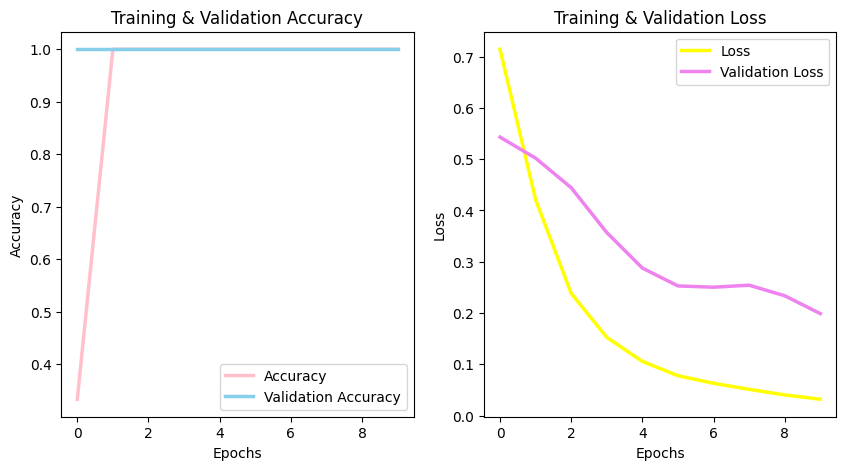

In [26]:
# Plot The Training Results
sequence_history_dict = sequence_history.history

accuracy = sequence_history_dict["accuracy"]
val_accuracy = sequence_history_dict["val_accuracy"]

loss = sequence_history_dict["loss"]
val_loss = sequence_history_dict["val_loss"]

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(accuracy, linewidth=2.5, color="pink")
plt.plot(val_accuracy,linewidth=2.5, color="skyblue")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy","Validation Accuracy"])

plt.subplot(1,2,2)
plt.plot(loss, linewidth=2.5, color="yellow")
plt.plot(val_loss, linewidth=2.5, color="violet")
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss","Validation Loss"])

plt.show()

#### ***Testing Phase (RNN)***

In [ ]:
# Testing The RNN Model
testing_sequences_sequences = sequence_words_tokenizer.texts_to_sequences(
    text_sequences_data["text"]
    )

testing_sequences = pad_sequences(testing_sequences_sequences,
                                  maxlen=50,
                                  padding='post')

predictions = sequence_model.predict(testing_sequences)
for i in range(len(predictions)):
    if (predictions[i] > 0.65):
        print("This sentence is math related!")
    else:
        print("This sentence is not math related!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
This sentence is math related!
This sentence is math related!
This sentence is math related!
This sentence is not math related!


### ***For The Shared Term: "Series"***

#### ***Building The RNN Model***

In [18]:
# Build The RNN Model
series_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=5000,
        output_dim=64,
        input_length=50),
    tf.keras.layers.SimpleRNN(64,return_sequences=False),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

series_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile The RNN Model
series_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

#### ***Training Phase (RNN)***

In [20]:
# Training The Model
series_words_tokenizer = Tokenizer(num_words=5000)
series_words_tokenizer.fit_on_texts([text_series_df["text"][1],
                                     text_series_df["text"][2],
                                     text_series_df["text"][3]])

# Create Training Content
train_sequences_of_series = series_words_tokenizer.texts_to_sequences([text_series_df["text"][1],
                                                                       text_series_df["text"][2],
                                                                       text_series_df["text"][3]])
series_train = pad_sequences(train_sequences_of_series,
                            maxlen=50,
                            padding='post')
series_train_labels = np.array([text_series_df["label"][1],
                                text_series_df["label"][2],
                                text_series_df["label"][3]])

# Create Testing Content
test_sequences_of_series = series_words_tokenizer.texts_to_sequences([text_series_df["text"][0]])
series_test = pad_sequences(test_sequences_of_series,
                            maxlen=50,
                            padding='post')
series_test_labels = np.array([text_series_df["label"][0]])

series_history = series_model.fit(series_train,
                                  series_train_labels,
                                  epochs=10,
                                  batch_size=2,
                                  validation_data = (series_test,series_test_labels))

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 659ms/step - accuracy: 1.0000 - loss: 0.6448 - val_accuracy: 1.0000 - val_loss: 0.6072
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 1.0000 - loss: 0.2959 - val_accuracy: 0.0000e+00 - val_loss: 0.8267
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 1.0000 - loss: 0.1899 - val_accuracy: 0.0000e+00 - val_loss: 0.8100
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 1.0000 - loss: 0.1189 - val_accuracy: 0.0000e+00 - val_loss: 0.7332
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 1.0000 - loss: 0.0789 - val_accuracy: 0.0000e+00 - val_loss: 0.7069
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 1.0000 - loss: 0.0652 - val_accuracy: 1.0000 - val_loss: 0.6872
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 1.0000 - loss: 0.0519 - val_accuracy: 1.0000 - val_loss: 0.6813
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 1.0000 - loss: 0.0399 - val_accuracy: 0.00

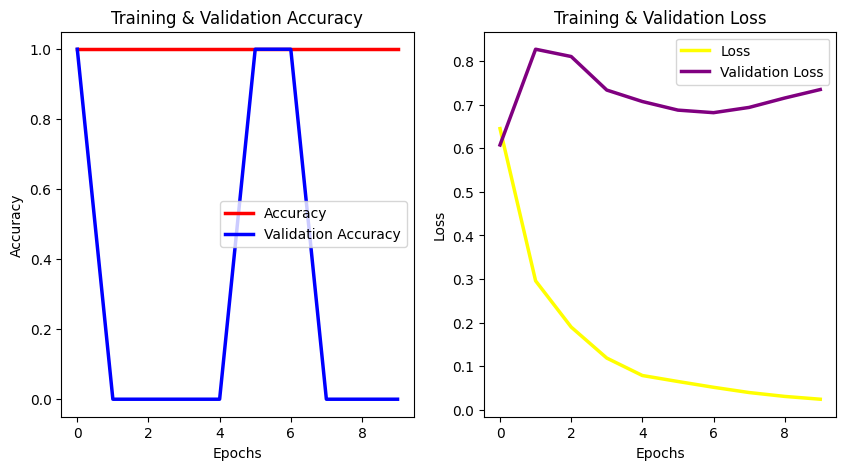

In [21]:
# Plot The Training Results
series_history_dict = series_history.history

accuracy = series_history_dict["accuracy"]
val_accuracy = series_history_dict["val_accuracy"]

loss = series_history_dict["loss"]
val_loss = series_history_dict["val_loss"]

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(accuracy, linewidth=2.5, color="red")
plt.plot(val_accuracy,linewidth=2.5, color="blue")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy","Validation Accuracy"])

plt.subplot(1,2,2)
plt.plot(loss, linewidth=2.5, color="yellow")
plt.plot(val_loss, linewidth=2.5, color="purple")
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss","Validation Loss"])

plt.show()

#### ***Testing Phase (RNN)***

In [22]:
# Testing The RNN Model
testing_sequences_series = series_words_tokenizer.texts_to_sequences(text_series_data["text"])

testing_series = pad_sequences(testing_sequences_series,
                               maxlen=50,
                               padding='post')

predictions = series_model.predict(testing_series)
for i in range(len(predictions)):
    if (predictions[i] > 0.65):
        print("This sentence is math related!")
    else:
        print("This sentence is not math related!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
This sentence is not math related!
This sentence is math related!
This sentence is math related!
This sentence is math related!
